In [1]:
##PAQUETES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
from tabulate import tabulate
import scipy
from scipy import stats
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import t 
import seaborn as sb

In [91]:
def ShappiroWilkins(s):
    stat, p = shapiro(s)

    # interpretacion 
    alpha = 0.05
    if p > alpha:
        msg = 'La muestra sigue una distribucion Gaussiana( no rechazamos H0) '
    else:
        msg = 'La muestra no sigue una distribucion Gaussiana (rechazamos H0)'

    #result_mat = [
     #   ['Longitud de la muestra ', 'Test Estadistico', 'p-value', 'Resultado'],
     #   [len(s), stat, p, msg]
    #]

    #swt_table = ff.create_table(result_mat)
    #swt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
    #swt_table['layout']['height']=200
    #swt_table['layout']['margin']['t']=50
    #swt_table['layout']['margin']['b']=50
    result_mat =[ [len(s), stat, p, msg
    ]]
    print(tabulate(result_mat, headers=['Longitud de la muestra ', 'Test Estadistico', 'p-value', 'Resultado']))
    print(round(np.mean(s),4),round(np.var(s),4))
    

    return 
    
    
    

In [ ]:
## Test de t-Student(#TODO:hacer un ttes para varias medias ,¿se puede ?)
def TStudent(data1,data2,alpha):
    from math import sqrt
    from numpy import mean 
    import numpy as np
    from scipy.stats import sem
    def ttest(data1, data2, alpha):
        mean1, mean2 = mean(data1), mean(data2)
        se1, se2 = sem(np.array(data1[0])),sem(np.array(data2[0]))
        sed = sqrt(se1**2.0 + se2**2.0)
        t_stat = (mean1 - mean2) / sed
        df = len(np.array(data1[0])) + len(np.array(data2[0])) - 2
        
        # calculate the critical value
        cv = t.ppf(1.0 - alpha, df)
        # calculate the p-value
        p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
        
        return t_stat, df, cv, p



    t_stat, df, cv, p = ttest(data1, data2, alpha)
    print('t=%.3f, df=%d, cv=%.3f, p_valor=%.3f' % (t_stat, df, cv, p))
    print("Según el estadístico t:")

    if abs(t_stat) <= cv:
        print('Se acepta la hipotesis nula que dice que las medias son iguales.')
    else:
        print('Se rechaza la hipotesis nula que dice que las medias son iguales.')
    # interpret via p-value
    print( "Según el p-value:")
    if p > alpha:
        print('Se acepta la hipotesis nula que dice que las medias son iguales.')
    else:
        print('Se rechaza la hipotesis nula que dice que las medias son iguales.')
    return p

In [ ]:
##Quitar outliers dada una lista y un dtt.
def off_outliers(Outliers,dtt):
    dtto=dtt
    ident=[]
    for i in Outliers:
        iden=dtto.iloc[i,0]
        ident.append(iden)
    for i in ident:
        dtto=dtto[dtto["Identificador"]!= i]
    return dtto


In [77]:
##Archivo a cargar 
dtt=pd.read_csv("Comparacion_correlaciones.csv",sep=";")

In [78]:
##Metodo PENG de series temporales : Pirimidinas (U, T y C): +1 y purinas (A y G): -1 
## NUEVO metodo para series temporales basado en la complementaridad de secuencias : (A, T y U): +1 y (C y G): -1

In [79]:
dtt

,Unnamed: 0,Identificador,NombreSecuencia,LongitudSecuencia,TipoSecuencia,Organismo,Reino,TipoAN,Gen,CodificanteOEstructural,Localizacion,NumeroExones,Funcion,PENG-alpha,PENG-R2,Correlacion_Nueva,Correlacion_Nueva_R2
0,0,K01383.1,"Human metallothionein-I-A gene, complete codin...",2941,Con,Homo sapiens,Animal,DNAlinear,Gen,Codificante,Nucleo,3,Metabolismo de metales,0.601515,0.991399,0.802729,0.994985
1,1,NT_033779.5:16766566-16788766,Drosophila melanogaster chromosome 2L,22201,Con,Drosophila melanogaster,Animal,DNAlinear,GenesRelacionados,Codificante,Nucleo,-,-,0.665465,0.994451,0.762119,0.996971
2,2,NC_001405.1,"Human adenovirus C, complete genome",35937,Con,Human mastadenovirus C,Virus,DNAlinear,GenomaCompleto,Codificante,Capsida,-,-,0.728425,0.990539,0.814762,0.995644
3,3,J01050.1,Caenorhabditis elegans myosin heavy chain (unc...,9000,Con,Caenorhabditis elegans,Animal,DNAlinear,Gen,Codificante,Nucleo,8,Estructural y motora,0.655317,0.988886,0.712388,0.994478
4,4,NM_059652.6,"Caenorhabditis elegans Myosin-1 (myo-1), mRNA",6548,Con,Caenorhabditis elegans,Animal,RNAlinear,Mensajero,Codificante,Citoplasma,-,Estructural y motora,0.606210,0.993482,0.553123,0.994544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,KR186107.1,Sarcocystis fusiformis isolate Bb6.1 cytochrom...,1038,Sin,Sarcocystis fusiformis,Protista,DNAlinear,genomicDNA,Codificante,Mitocondria,-,-,0.439061,0.989998,0.376435,0.989777
314,314,AJ307013.1,Amphidinium carterae chloroplast minicircle 17...,1995,Sin,Amphidinium carterae,Protista,DNAcircular,genomicDNA,Codificante,Cloroplasto,-,-,0.588512,0.992805,0.521115,0.994975
315,315,EU579933.1,"Padina gymnospora isolate LBC72 ribulose-1,5-b...",1353,Sin,Padina gymnospora,Protista,DNAlinear,genomicDNA,Codificante,Cloroplasto,-,-,0.322873,0.982723,0.553486,0.994995
316,316,KM603331.1,Trichomonas vaginalis voucher LY-1 18S ribosom...,1493,Sin,Trichomonas vaginalis,Protista,DNAcircular,Ribosomal,Estructural,Mitocondria,-,-,0.444118,0.988273,0.478348,0.996372


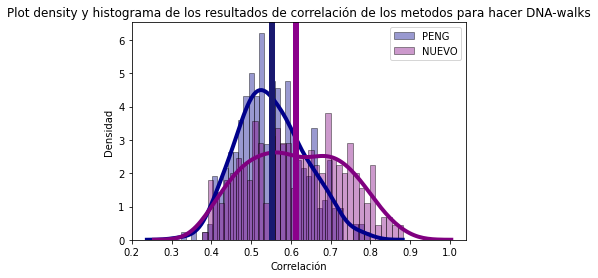

In [80]:
##Histogramas 
PENG= np.array(dtt["PENG-alpha"])
NUEVO= np.array(dtt["Correlacion_Nueva"])
sns.distplot(PENG,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.ylabel("Densidad")
plt.xlabel("Correlación")
plt.title("Plot density y histograma de los resultados de correlación de los metodos para hacer DNA-walks")

sns.distplot(NUEVO,
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.legend(["PENG","NUEVO"])
plt.axvline(NUEVO.mean(),color="darkmagenta",linewidth=6)
plt.axvline(PENG.mean(),color="midnightblue",linewidth=6)

In [81]:
##Medias de la correlación de los metodos

print("Media PENG " + str( dtt["PENG-alpha"].mean()))
print("Media NUEVO " + str(  dtt["Correlacion_Nueva"].mean()))

Media PENG 0.5514958202370718
Media NUEVO 0.6136505422978508


In [82]:
## Desviacion típica 

print("Desvest PENG " + str(  dtt["PENG-alpha"].std()))
print("Desvest NUEVO " + str(  dtt["Correlacion_Nueva"].std()))

Desvest PENG 0.08459866383145889
Desvest NUEVO 0.12018964344071692


In [83]:
## Mínimo y Máximo

print("Mínimo PENG " + str(  dtt["PENG-alpha"].min()) + " Máximo PENG " + str(  dtt["PENG-alpha"].max()))
print("Mínimo NUEVO " + str(  dtt["Correlacion_Nueva"].min()) +" Máximo NUEVO " + str(  dtt["Correlacion_Nueva"].max()))

Mínimo PENG 0.3228731288204395 Máximo PENG 0.796007132916801
Mínimo NUEVO 0.3764353576360226 Máximo NUEVO 0.8823798161208263


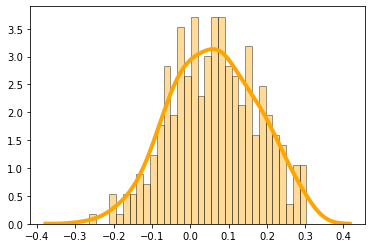

In [84]:
## Diferencias entre las correlaciones
Dif=NUEVO-PENG
sns.distplot(Dif,bins=int(32), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [98]:
dtt["Diferencias"]=Dif

In [99]:
dtt

,Unnamed: 0,Identificador,NombreSecuencia,LongitudSecuencia,TipoSecuencia,Organismo,Reino,TipoAN,Gen,CodificanteOEstructural,Localizacion,NumeroExones,Funcion,PENG-alpha,PENG-R2,Correlacion_Nueva,Correlacion_Nueva_R2,Diferencias
0,0,K01383.1,"Human metallothionein-I-A gene, complete codin...",2941,Con,Homo sapiens,Animal,DNAlinear,Gen,Codificante,Nucleo,3,Metabolismo de metales,0.601515,0.991399,0.802729,0.994985,0.201214
1,1,NT_033779.5:16766566-16788766,Drosophila melanogaster chromosome 2L,22201,Con,Drosophila melanogaster,Animal,DNAlinear,GenesRelacionados,Codificante,Nucleo,-,-,0.665465,0.994451,0.762119,0.996971,0.096654
2,2,NC_001405.1,"Human adenovirus C, complete genome",35937,Con,Human mastadenovirus C,Virus,DNAlinear,GenomaCompleto,Codificante,Capsida,-,-,0.728425,0.990539,0.814762,0.995644,0.086337
3,3,J01050.1,Caenorhabditis elegans myosin heavy chain (unc...,9000,Con,Caenorhabditis elegans,Animal,DNAlinear,Gen,Codificante,Nucleo,8,Estructural y motora,0.655317,0.988886,0.712388,0.994478,0.057070
4,4,NM_059652.6,"Caenorhabditis elegans Myosin-1 (myo-1), mRNA",6548,Con,Caenorhabditis elegans,Animal,RNAlinear,Mensajero,Codificante,Citoplasma,-,Estructural y motora,0.606210,0.993482,0.553123,0.994544,-0.053088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,KR186107.1,Sarcocystis fusiformis isolate Bb6.1 cytochrom...,1038,Sin,Sarcocystis fusiformis,Protista,DNAlinear,genomicDNA,Codificante,Mitocondria,-,-,0.439061,0.989998,0.376435,0.989777,-0.062625
314,314,AJ307013.1,Amphidinium carterae chloroplast minicircle 17...,1995,Sin,Amphidinium carterae,Protista,DNAcircular,genomicDNA,Codificante,Cloroplasto,-,-,0.588512,0.992805,0.521115,0.994975,-0.067397
315,315,EU579933.1,"Padina gymnospora isolate LBC72 ribulose-1,5-b...",1353,Sin,Padina gymnospora,Protista,DNAlinear,genomicDNA,Codificante,Cloroplasto,-,-,0.322873,0.982723,0.553486,0.994995,0.230613
316,316,KM603331.1,Trichomonas vaginalis voucher LY-1 18S ribosom...,1493,Sin,Trichomonas vaginalis,Protista,DNAcircular,Ribosomal,Estructural,Mitocondria,-,-,0.444118,0.988273,0.478348,0.996372,0.034230


In [85]:
Dif.mean()

0.062154722060779266

In [86]:
Dif.max()

0.3032898895343552

In [87]:
Dif.min()

-0.2653485706706228

In [88]:
#Analisis de la correlacion con el nuevo metodo de series temporales en funcion del tipo de acido nucleico (Con y sin Intrones)


In [89]:
estadisticos=[["Correlacion_Nueva","Con",dtt[dtt["TipoSecuencia"]=="Con"]["Correlacion_Nueva"].shape[0],dtt[dtt["TipoSecuencia"]=="Con"]["Correlacion_Nueva"].mean(),dtt[dtt["TipoSecuencia"]=="Con"]["Correlacion_Nueva"].var(),dtt[dtt["TipoSecuencia"]=="Con"]["Correlacion_Nueva"].std(),dtt[dtt["TipoSecuencia"]=="Con"]["Correlacion_Nueva"].min(),dtt[dtt["TipoSecuencia"]=="Con"]["Correlacion_Nueva"].max(),dtt[dtt["TipoSecuencia"]=="Con"]["PENG-R2"].mean()],
                           ["","Sin",dtt[dtt["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"].shape[0],dtt[dtt["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"].mean(),dtt[dtt["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"].var(),dtt[dtt["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"].std(),dtt[dtt["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"].min(),dtt[dtt["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"].max(),dtt[dtt["TipoSecuencia"]=="Sin"]["PENG-R2"].mean()]
    
]
print(tabulate(estadisticos, headers=["Metodo","TipoSecuencia","Nº Secuencias", "Media del alpha","Varianza del alpha","Desv tipica del alpha","Minimo alpha","Maximo alpha","Media del R2"]))

Metodo             TipoSecuencia      Nº Secuencias    Media del alpha    Varianza del alpha    Desv tipica del alpha    Minimo alpha    Maximo alpha    Media del R2
-----------------  ---------------  ---------------  -----------------  --------------------  -----------------------  --------------  --------------  --------------
Correlacion_Nueva  Con                          108           0.681719            0.00708318                0.0841616        0.459855        0.88238         0.990365
                   Sin                          210           0.578644            0.0146584                 0.121072         0.376435        0.870645        0.990564


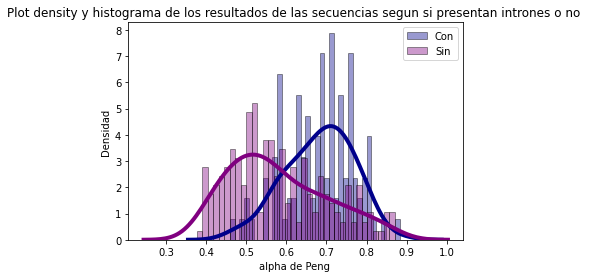

In [95]:
##Histogramas 
limite=0
dtt_limite=dtt[dtt["LongitudSecuencia"]>limite]
Con= list(dtt_limite[dtt_limite["TipoSecuencia"]=="Con"]["Correlacion_Nueva"]),
Sin= list(dtt_limite[dtt_limite["TipoSecuencia"]=="Sin"]["Correlacion_Nueva"]),
sns.distplot(Con,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.ylabel("Densidad")
plt.xlabel("alpha de Peng ")
plt.title("Plot density y histograma de los resultados de las secuencias segun si presentan intrones o no ")

sns.distplot(Sin,
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.legend(["Con","Sin"])

In [96]:
#Test de SHAPPIRO WILKINS para ambos histogramas 
#CON INTRONES
ShappiroWilkins(list(Con[0]))


  Longitud de la muestra     Test Estadistico    p-value  Resultado
-------------------------  ------------------  ---------  --------------------------------------------------------------
                      108            0.985828   0.310838  La muestra sigue una distribucion Gaussiana( no rechazamos H0)
0.6817 0.007


In [97]:
#SIN INTRONES
ShappiroWilkins(list(Sin[0]))

  Longitud de la muestra     Test Estadistico      p-value  Resultado
-------------------------  ------------------  -----------  --------------------------------------------------------------
                      210            0.956811  5.53432e-06  La muestra no sigue una distribucion Gaussiana (rechazamos H0)
0.5786 0.0146
